# US. Medical Insurance Data

### Scoping the Project


#### <span style="color:red"> Goals: </span> 
##### Predict medical insurance costs based on demographic and lifestyle variables, figure out what factors make a person more expensive, create a model to assist in premium pricing or customer segmentation.  
#### <span style="color:red">Data:</span> 
##### quantitative and qualitative
#### <span style="color:red"> Data exploration: </span>
##### missing data? cleanliness? distribution of variables? relationship betw. variables(e.g. smoker and charges) 
#### <span style="color:red">In-scope Tasks:</span>
data cleaning, exploratory data analysis, regression moeling(linear regression, decision trees), feature imporance analysis (key drivers of charges)
#### <span style="color:red">workflow: </span>
-Data exploration (Summarize data, identify missing values, otliers or data imbalances)
##### &nbsp;&nbsp;&nbsp;&nbsp;`Average age of people in the dataset`

##### &nbsp;&nbsp;&nbsp;&nbsp;`Where is the majority of people from, difference in costs between regions?`
##### &nbsp;&nbsp;&nbsp;&nbsp;`Costs between smokers & non-smokers `
##### &nbsp;&nbsp;&nbsp;&nbsp;`Aerage age for people with one child or more`
##### -Model development (feature engineering, e.g. encoding categorical variables like region and smoker, train predictive models)
-Analysis of Results (validate the model on a test dataset)
##### -Deliverables (predictive model, presentation summarizing findings and recommendations)


In [75]:
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt 
import csv
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind

class MedicalInsuranceAnalysis:
    def __init__(self, data_path):
        self.df = pd.read_csv(data_path)
        self.missing_data = self.df.isnull().sum()

    def plot_by_category(self, x_column, y_column, title):
        sns.boxplot(x=x_column, y=y_column, data = self.df)
        plt.title(title)
        plt.show()

    def scatterplot(self, x_column, y_column, title):
        sns.scatterplot(x= x_column, y= y_column, data = self.df)
        plt.title(title)
        plt.show()

    def scatterplot_hue(self, x_column, y_column, hue, title):
        sns.scatterplot(x= x_column, y= y_column, data= self.df, hue = hue)
        plt.title(title)
        plt.show()

    def summary_statistics(self):
        return self.df.describe()

    def correlation_matrix(self):
        numeric_df = self.df.select_dtypes(include=['number'])
        corr = numeric_df.corr()
        plt.figure(figsize=(10,8))
        sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidth=0.5)
        plt.title('Correlation Matrix')
        plt.show()

    def ttest_sex_charges(self):
        male_charges = self.df[self.df['sex']== 'male']['charges']
        female_charges = self.df[self.df['sex']== 'female']['charges']
        t_stat, p_val = ttest_ind(male_charges, female_charges)
        return t_stat, p_val

    def ttest_group(self, group_col, value_col, group1, group2):
        group1_values = self.df[self.df[group_col]== group1][value_col]
        group2_values = self.df[self.df[group_col]== group2][value_col]
        t_stat, p_val = ttest_ind(group1_values, group2_values)
        return t_stat, p_val

    def mannwhitneyu_sex_charges(self):
        male_charges = self.df[self.df['sex']== 'male']['charges']
        female_charges = self.df[self.df['sex']== 'female']['charges']
        stat, p_val = mannwhitneyu(male_charges, female_charges)
        return stat, p_val

    def remove_outliers(self):
        Q1 = self.df['charges'].quantile(0.25)
        Q3 = self.df['charges'].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        self.df = self.df[(self.df['charges']>= lower_bound) & (self.df['charges'] <= upper_bound)]

    def mean_age_with_children(self):
        people_with_children = self.df[self.df['children']> 0]
        mean_age = people_with_children['age'].mean()
        return mean_age

    def plot_smoker_vs_charges(self):
        self.plot_by_category(x_column='smoker', y_column='charges', title='Insurance Charges by Smoking Status')

    def plot_region_vs_charges(self):
        self.plot_by_category(x_column='region', y_column='charges', title='Insurance Charges by Region')

    def plot_sex_vs_charges(self):
        self.plot_by_category(x_column='sex', y_column='charges', title='Insurance Charges by Sex')

# Exploratory Data Analysis:

In [78]:
data_path = 'insurance.csv'
analysis = MedicalInsuranceAnalysis(data_path)

print(analysis.summary_statistics())


               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


The mean age is 39.21, which indicates that the dataset represents a middle-aged population. However the standard deviation(14.05indicates there is variation in age, ranging from 18 to 64. 
##### The mean BMI is 30.66, which is slightly above the threshold of 30, the boundry for obesity according to BMI classifications. The range is from 15.96 to 53.13 with a standard deviation of 6.10, indicationg there is significant variation in BMI values. 
##### The mean of children is 1.09 with a range from 0 to a maximum of 5. 
##### The mean of insurance charges is 13270.42. but the standard deviation is 12110.01, indicating a significant variation in the medical charges. The mean could be elevated by some cases with extremely high charges, which might skew the overall distribution and mean. The range suggests that some people have charges as low as 1121.87, while others have charges as high as 63770.43. This could be due to different factors influencing the costs(e.g. age, BMI, region, smoker status..). 

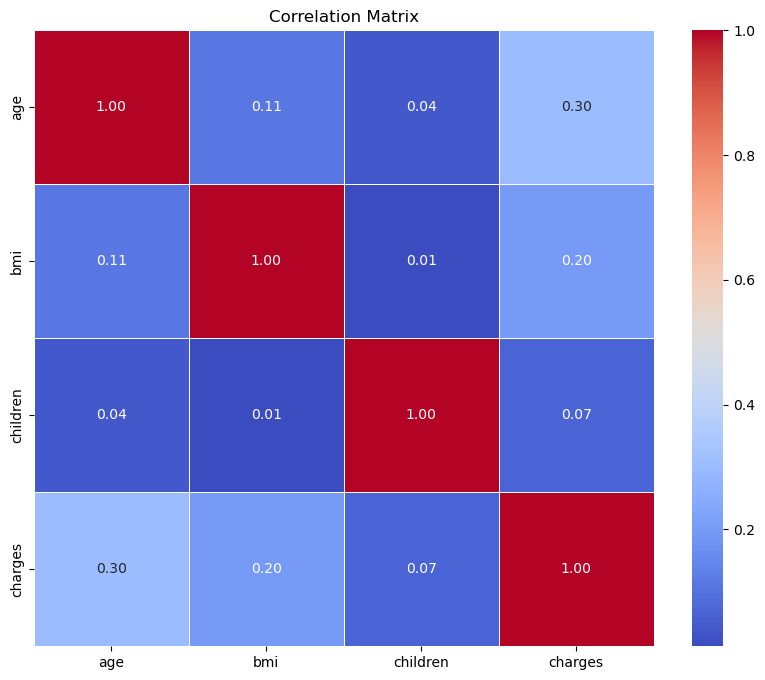

In [81]:
analysis.correlation_matrix()

The correlation matrix highlights the relationships between different numeric variables in the dataset. 
##### Values close to 1 show a strong positive correlation.
##### Values close to -1 show a strong negative correlation. 
##### Values close to 0 show no or weak correlation. 
##### A weak correlation of 0.30 is observed between charges and age.
##### Possibly a very weak correlation of 0.20 is observed between the variables bmi and charges. 


In [84]:
mean_age = analysis.mean_age_with_children()
print(f"The mean age of people with children is {mean_age:.2f} years.")

The mean age of people with children is 39.78 years.


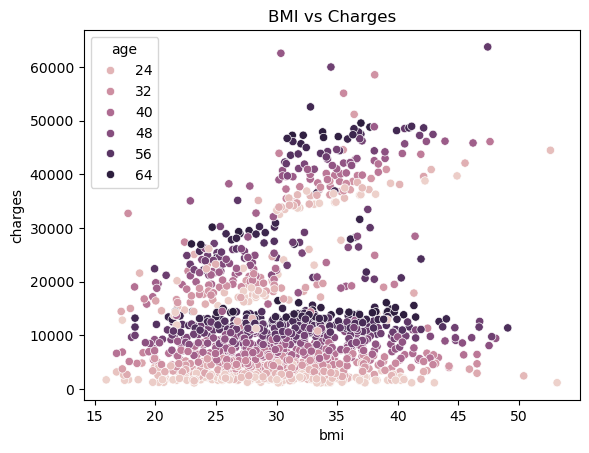

In [86]:
analysis.scatterplot_hue(x_column= 'bmi', y_column= 'charges',hue='age',title= 'BMI vs Charges')

##### The scatterplot shows the relationship between BMI and Charges, with Age represented by color.
##### 

 # Comparative Analysis

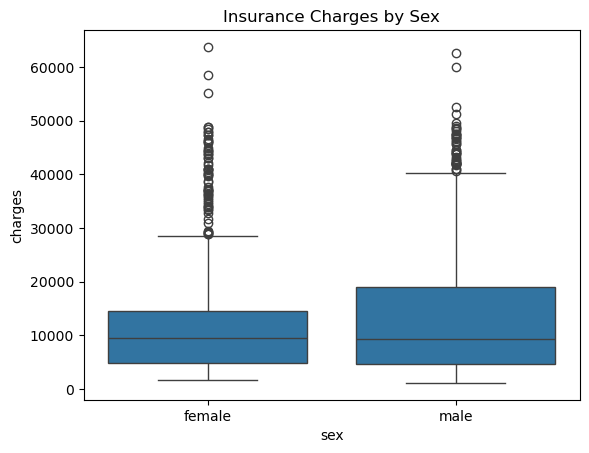

In [90]:
analysis.plot_sex_vs_charges()

##### Since the p-value is less than 0.05, there is a significant difference in charges between the two groups. The t-statistic indicates there is a difference in means. 

In [94]:
t_stat, p_val = analysis.ttest_group('sex', 'charges', 'male', 'female')
print(f"t-stat: {t_stat}, pvalue: {p_val}")

t-stat: 2.097546590051688, pvalue: 0.03613272100592976


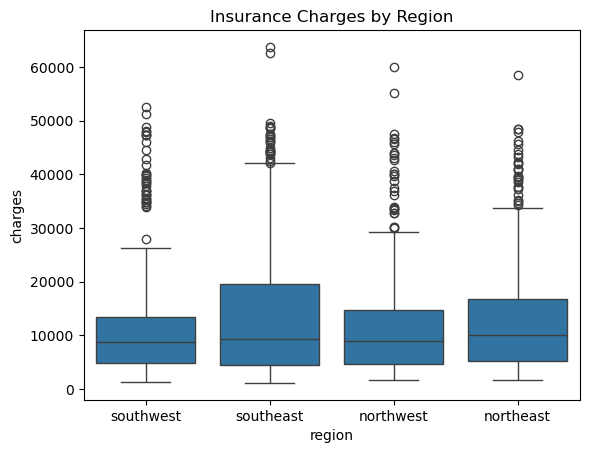

In [30]:
analysis.plot_region_vs_charges()

In [32]:
t_stat, p_val = analysis.ttest_sex_charges()
print(f"T-test results: t-statistic = {t_stat}, p-value = {p_val}")

stat, p_val = analysis.mannwhitneyu_sex_charges()
print(f"Mann-Whitney U test results: stat = {stat}, p-value = {p_val}")

T-test results: t-statistic = 2.097546590051688, p-value = 0.03613272100592976
Mann-Whitney U test results: stat = 226208.0, p-value = 0.7286510894470093


##### The p-value is less than 0.05, indicating that there is a significant difference between the groups. However when the Mann-Whitney U test is made, the p-value is not significant anymore with 0.73. 

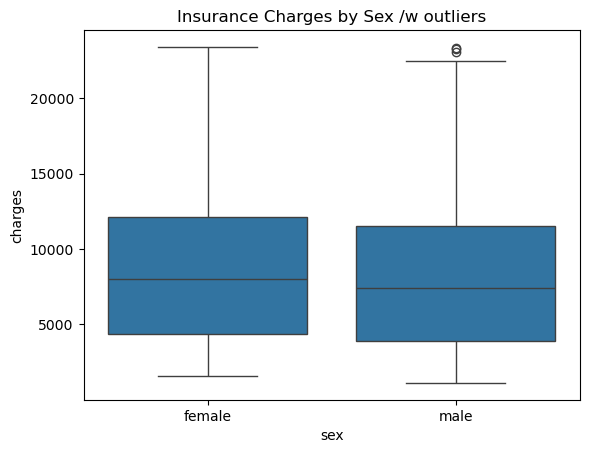

In [65]:
analysis.remove_outliers()
analysis.plot_by_category(x_column='sex', y_column= 'charges', title = 'Insurance Charges by Sex /w outliers')

In [52]:
analysis.ttest_sex_charges()

(-1.0813537131266957, 0.27977216354498885)

##### After removing the outliers, the p-value is not significant anymore and is > 0.05. Suggesting there is no difference in insurance charges between the female and the male group. 

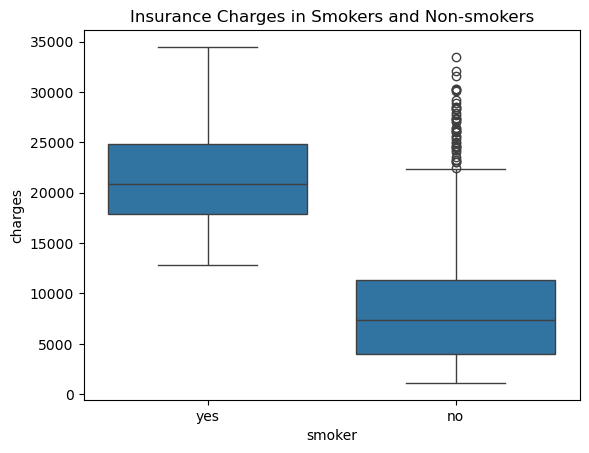

In [36]:
analysis.plot_by_category(x_column= 'smoker', y_column= 'charges', title= 'Insurance Charges in Smokers and Non-smokers')

In [ ]:
analysis.ttest_

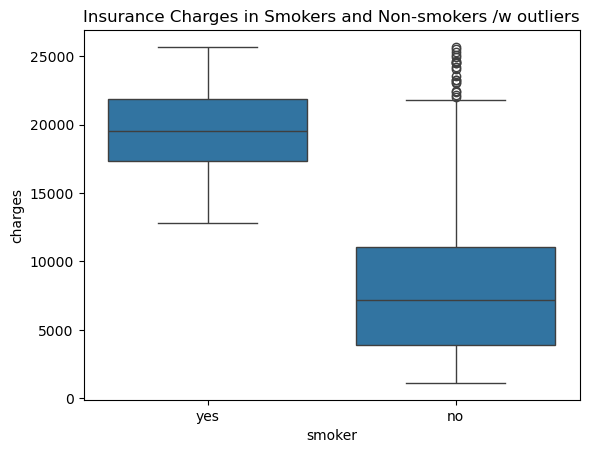

In [38]:
analysis.remove_outliers()
analysis.plot_by_category(x_column= 'smoker', y_column= 'charges', title= 'Insurance Charges in Smokers and Non-smokers /w outliers')